# Explore here

In [73]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

bank_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", delimiter=';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [63]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [64]:
if bank_data.duplicated().sum():
    bank_data = bank_data.drop_duplicates()

bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


/tmp/ipykernel_670/2428387615.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_670/2428387615.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_670/2428387615.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_670/2428387615.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_670/2428387615.py:9: UserWarning: set_ticklabels() should only be used with a fix

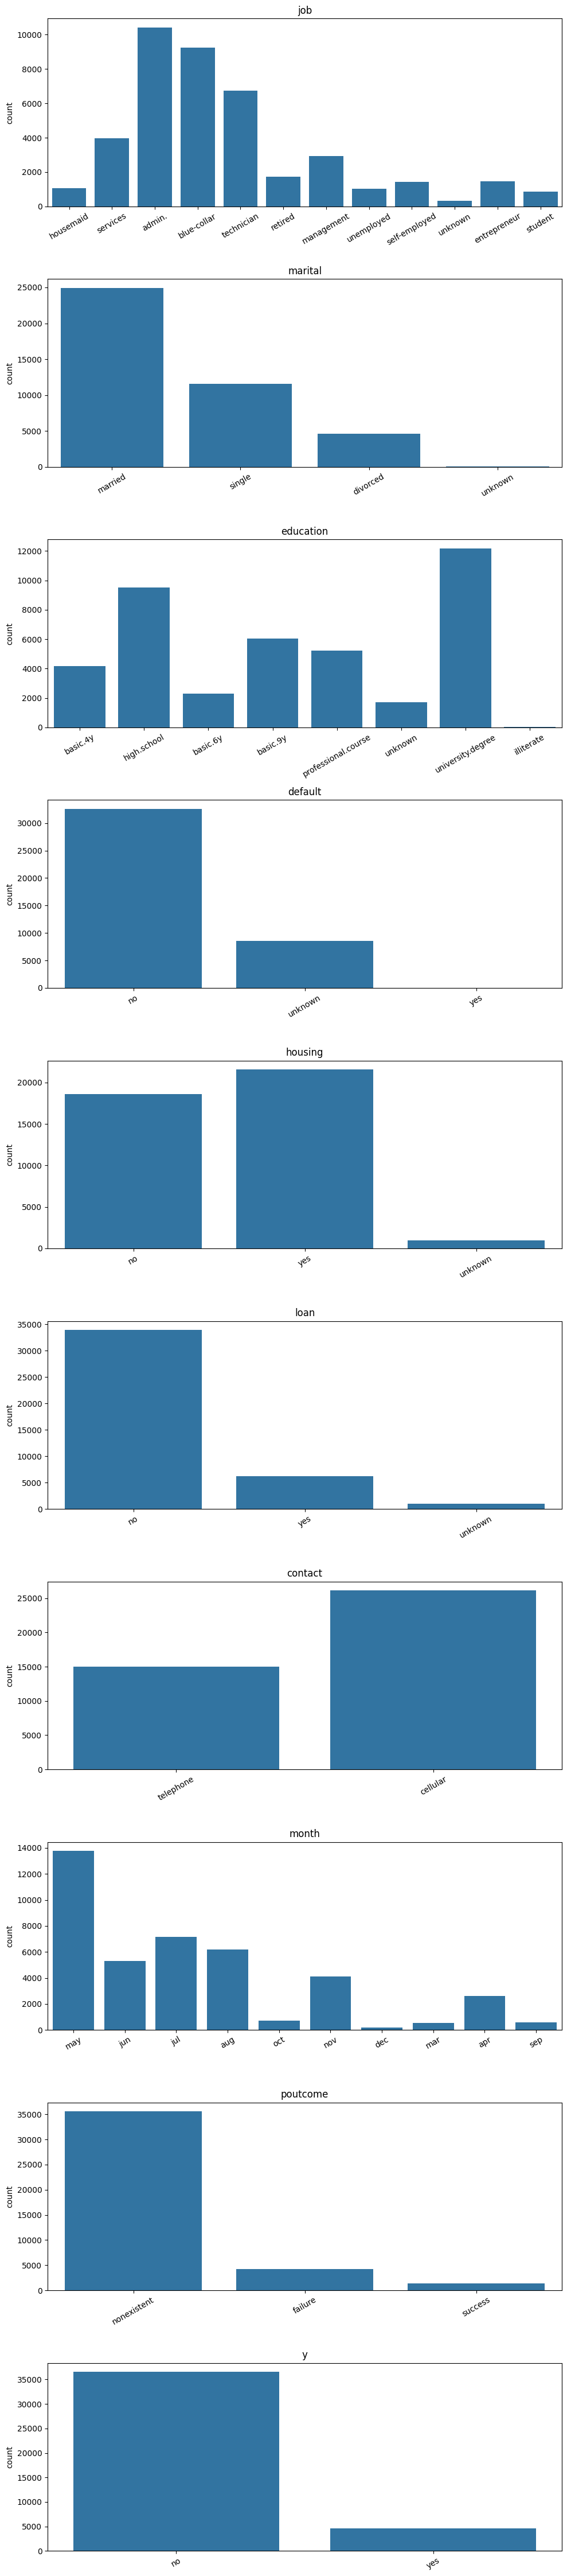

In [65]:
col_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=bank_data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [66]:
bank_data.drop(columns=["contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous"], inplace=True)
bank_data.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
bank_data.describe()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [68]:
object_columns = bank_data.select_dtypes(include='object').columns

for col in object_columns:
    bank_data[col], _ = pd.factorize(bank_data[col])


scaler = MinMaxScaler()
numeric_columns = bank_data.select_dtypes(include=['float64', 'int64']).columns
scal_features = scaler.fit_transform(bank_data[numeric_columns])
bank_data_scal = pd.DataFrame(scal_features, index=bank_data.index, columns=numeric_columns)

bank_data_scal.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [69]:
X = bank_data_scal.drop("y", axis=1)
y= bank_data_scal["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8907236522583779

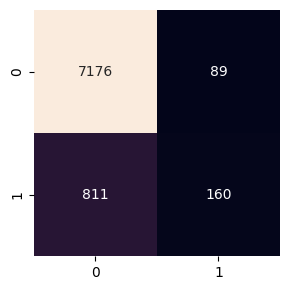

In [72]:
bank_data_cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(bank_data_cm)

plt.figure(figsize=(3,3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()
plt.show()

In [83]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [84]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [81]:
model_grid = LogisticRegression(penalty = "l2", C = 0.1, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8910879067508499